In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as s

In [3]:
data = pd.read_csv('../../Doutorado/GAMAII/Catalogue/Match08_smallemlines_environment.csv')

In [45]:
for i in data.keys():
    print(i)

CATAID
OBJID_SDSSDR7
ALPHA_J2000
DELTA_J2000
KRON_RADIUS
PETRO_RADIUS
MAG_PETRO_u
MAGERR_PETRO_u
FLAGS_u
MAG_PETRO_g
MAGERR_PETRO_g
FLAGS_g
MAG_PETRO_r
MAGERR_PETRO_r
FLAGS_r
MAG_PETRO_i
MAGERR_PETRO_i
FLAGS_i
MAG_PETRO_z
MAGERR_PETRO_z
FLAGS_z
MAG_PETRO_X
MAGERR_PETRO_X
FLAGS_X
MAG_PETRO_Y
MAGERR_PETRO_Y
FLAGS_Y
MAG_PETRO_J
MAGERR_PETRO_J
FLAGS_J
MAG_PETRO_H
MAGERR_PETRO_H
FLAGS_H
MAG_PETRO_K
MAGERR_PETRO_K
FLAGS_K
FLAGS
PSFMAG_R
FIBERMAG_R
FLAGS_R_SDSS
PETRORAD_R
PETROR90_R
PETROR50_R
PETROMAG_R
MODELMAG_U
MODELMAG_G
MODELMAG_R
MODELMAG_I
MODELMAG_Z
STATUS
BEST_MAG_NUV
BEST_MAGERR_NUV
BEST_MAG_FUV
BEST_MAGERR_FUV
BEST_METHOD
NMATCHUV
NMATCHOPT
NUVFLAG
FUVFLAG
NN_DIST
NN_NMATCH4
NN_MANY2ONE
NN_SFLAGS_NUV
NN_SFLAGS_FUV
KCORR_FUV
KCORR_NUV
KCORR_U
KCORR_G
KCORR_R
KCORR_I
KCORR_Z
KCORR_Y
KCORR_J
KCORR_H
KCORR_K
CHI2
MASS
INTSFH
METS
B300
B1000
SURVEY_CODE
SURVEY_CLASS
nbands
S2N
PPP
logmstar
dellogmstar
logmoverl_i
dellogmoverl_i
logage
dellogage
logtau
dellogtau
logmintsfh
dellogmintsfh

In [10]:
rsgs = data[data['UV_CLASS_YI2011']!='RSF']

In [21]:
uv_weak   = data[data['UV_CLASS_YI2011']=='UV_WEAK']
uv_weak   = uv_weak[uv_weak['WHAN_CLASS']=='Retired/Passive']
uv_upturn = data[data['UV_CLASS_YI2011']=='UV_UPTURN']
uv_upturn = uv_upturn[uv_upturn['WHAN_CLASS']=='Retired/Passive']

In [22]:
uv_weak   = uv_weak[uv_weak['SurfaceDensityFlag']==0]
uv_upturn = uv_upturn[uv_upturn['SurfaceDensityFlag']==0]

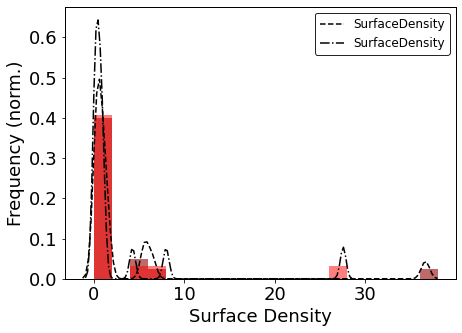

In [23]:
plt.rcParams.update(plotpars)
plt.hist(uv_weak['SurfaceDensity'], bins=np.arange(0, 40, 2), color='brown',alpha=0.7, density=True)
plt.hist(uv_upturn['SurfaceDensity'], bins=np.arange(0, 40, 2), color='red', alpha=0.5, density=True)
sns.kdeplot(uv_weak['SurfaceDensity'], linestyle='--', color='black')
sns.kdeplot(uv_upturn['SurfaceDensity'], linestyle='-.', color='black')
plt.xlabel(r"Surface Density")
plt.ylabel(r"Frequency (norm.)")
# plt.xlim([0,10])
plt.show()

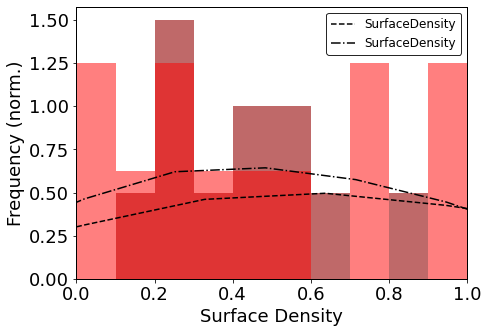

In [24]:
plt.rcParams.update(plotpars)
plt.hist(uv_weak['SurfaceDensity'], bins=np.arange(0, 40, 0.1), color='brown',alpha=0.7, density=True)
plt.hist(uv_upturn['SurfaceDensity'], bins=np.arange(0, 40, 0.1), color='red', alpha=0.5, density=True)
sns.kdeplot(uv_weak['SurfaceDensity'], linestyle='--', color='black')
sns.kdeplot(uv_upturn['SurfaceDensity'], linestyle='-.', color='black')
plt.xlabel(r"Surface Density")
plt.ylabel(r"Frequency (norm.)")
plt.xlim([0,1])
plt.show()

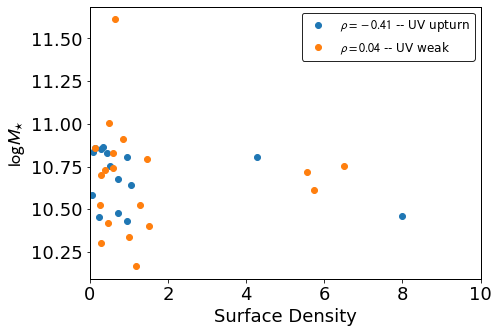

In [34]:
plt.plot(uv_upturn['SurfaceDensity'], uv_upturn['logmstar'], 'o', label=r"$\rho=%.2f$ -- UV upturn" 
         % s.spearmanr(uv_upturn['SurfaceDensity'].values, uv_upturn['logmstar'].values)[0])
plt.plot(uv_weak['SurfaceDensity'], uv_weak['logmstar'], 'o', label=r"$\rho=%.2f$ -- UV weak" 
         % s.spearmanr(uv_weak['SurfaceDensity'].values, uv_weak['logmstar'].values)[0])
plt.xlabel(r"Surface Density")
plt.ylabel(r"$\log M_{\star}$")
plt.legend(loc='best')
plt.xlim([0,10])
plt.show()

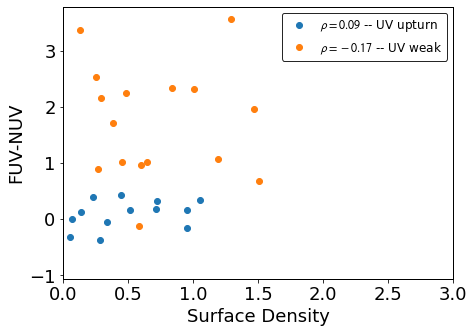

In [42]:
plt.plot(uv_upturn['SurfaceDensity'], uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV'], 'o', 
         label=r"$\rho=%.2f$ -- UV upturn" 
         % s.spearmanr(uv_upturn['SurfaceDensity'].values, 
                       (uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_NUV']).values)[0])
plt.plot(uv_weak['SurfaceDensity'],  uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV'], 'o', 
         label=r"$\rho=%.2f$ -- UV weak" 
         % s.spearmanr(uv_weak['SurfaceDensity'].values, (uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_NUV']).values)[0])
plt.xlabel(r"Surface Density")
plt.ylabel(r"FUV-NUV")
plt.legend(loc='best')
plt.xlim([0,3])
plt.show()

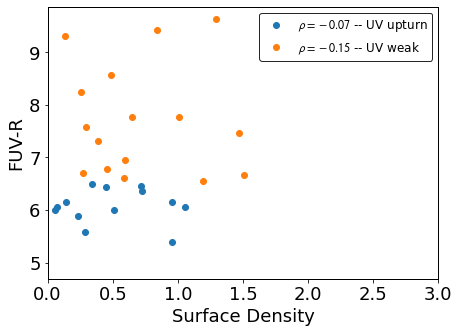

In [44]:
plt.plot(uv_upturn['SurfaceDensity'], uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'], 'o', 
         label=r"$\rho=%.2f$ -- UV upturn" 
         % s.spearmanr(uv_upturn['SurfaceDensity'].values, uv_upturn['MAG_AB_FUV']-uv_upturn['MAG_AB_R'])[0])
plt.plot(uv_weak['SurfaceDensity'],  uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'], 'o', 
         label=r"$\rho=%.2f$ -- UV weak" 
         % s.spearmanr(uv_weak['SurfaceDensity'].values, uv_weak['MAG_AB_FUV']-uv_weak['MAG_AB_R'])[0])
plt.xlabel(r"Surface Density")
plt.ylabel(r"FUV-R")
plt.legend(loc='best')
plt.xlim([0,3])
plt.show()

In [60]:
heatmap_up = uv_upturn[['CATAID', 'SurfaceDensity', 'MAG_ABSOLUTE_FUV', 'MAG_ABSOLUTE_NUV', 'MAG_ABSOLUTE_R', 
                        'metal', 'logmstar']]

In [63]:
colour_up = {}
colour_up['CATAID'] = uv_upturn['CATAID']
colour_up['FUV-NUV'] = uv_upturn['MAG_AB_FUV'] - uv_upturn['MAG_AB_NUV']
colour_up['FUV-R'] = uv_upturn['MAG_AB_FUV'] - uv_upturn['MAG_AB_R']
colour_up['NUV-R'] = uv_upturn['MAG_AB_NUV'] - uv_upturn['MAG_AB_R']
colour_up = pd.DataFrame(colour_up)

In [64]:
heatmap_up = heatmap_up.merge(colour_up, how='inner', on='CATAID')

In [65]:
heatmap_up = heatmap_up.drop(['CATAID'], axis=1)

In [66]:
cmap = sns.diverging_palette(179, 40, n=10)

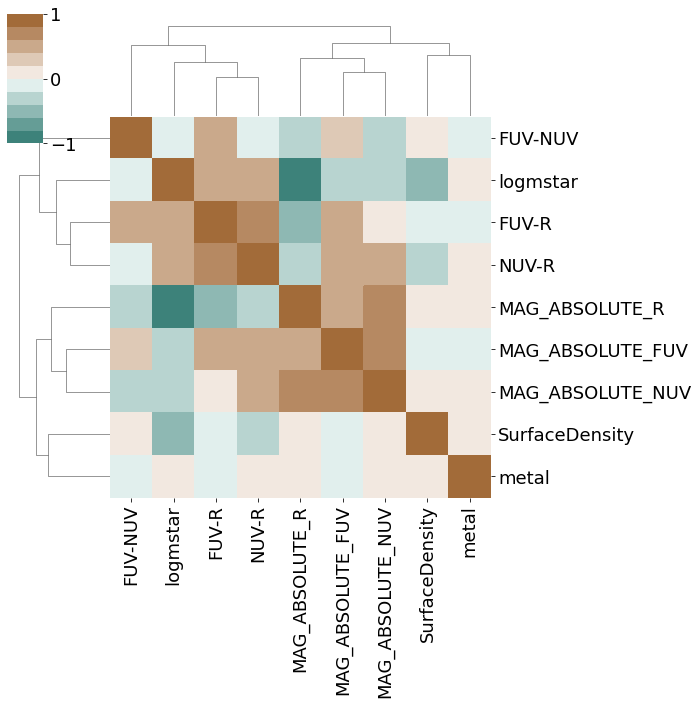

In [68]:
sns.clustermap(heatmap_up.corr(method='spearman'), cmap = cmap, vmin=-1, vmax=1.) #annot=True
plt.show()